# **Tiny DS Project: Global Warming**

####            Austin Wright, MSc Data Science, City UOL

In [141]:
# Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Using the Datetime method as shown in visual analytics 
def dt_parse(timestamp_str):
    return pd.to_datetime(timestamp_str, format='%Y%m%d %H:%M:%S', errors='coerce')

global_temp_DF = pd.read_csv('GlobalTemperatures.csv',parse_dates=['dt'], date_parser=dt_parse)


global_temp_DF['year'] = global_temp_DF['dt'].dt.year
global_temp_DF['month'] = global_temp_DF['dt'].dt.month

X = global_temp_DF[global_temp_DF['month'] == 1]['dt'].index.to_numpy()
Y = global_temp_DF[global_temp_DF['month'] == 1]['LandAverageTemperature'].to_numpy()

X = X.reshape(266,1)
Y = Y.reshape(266,1)

In [2]:
global_temp_DF['dt']

0      1750-01-01
1      1750-02-01
2      1750-03-01
3      1750-04-01
4      1750-05-01
          ...    
3187   2015-08-01
3188   2015-09-01
3189   2015-10-01
3190   2015-11-01
3191   2015-12-01
Name: dt, Length: 3192, dtype: datetime64[ns]

In [3]:
#print(global_temp_DF.info())
global_temp_DF.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,3192.000000,3192.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532,1882.500000,6.500000
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587,76.799074,3.452593
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000,1750.000000,1.000000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000,1816.000000,3.750000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000,1882.500000,6.500000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000,1949.000000,9.250000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000,2015.000000,12.000000


In [4]:
Z = np.array([X,Y]).reshape(266,2)
np.shape(Z)

(266, 2)

In [5]:
pd.DataFrame(data=Z,columns=['daysfrom','temp'])

,daysfrom,temp
0,0.000,12.000
1,24.000,36.000
2,48.000,60.000
3,72.000,84.000
4,96.000,108.000
...,...,...
261,3.286,4.579
262,2.844,3.687
263,3.737,3.282
264,3.157,3.685


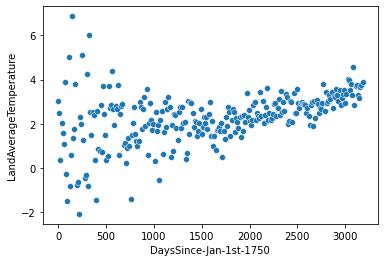

In [6]:
sns.scatterplot(data=global_temp_DF[global_temp_DF['month'] == 1]['LandAverageTemperature'])
plt.xlabel('DaysSince-Jan-1st-1750')
plt.show()

In [7]:
global_temp_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3192 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
 9   year               

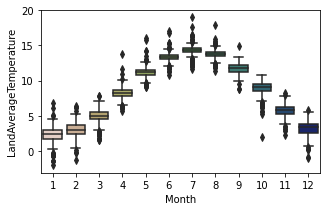

In [8]:
plt.figure(figsize=(5,3))
sns.boxplot(data = global_temp_DF, x='month', y='LandAverageTemperature',palette='gist_earth_r')
plt.xlabel('Month')
plt.show()

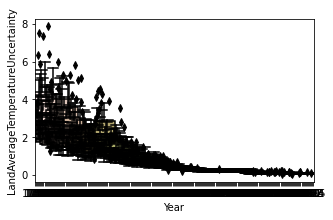

In [13]:
plt.figure(figsize=(5,3))
sns.boxplot(data = global_temp_DF, x='year', y='LandAverageTemperatureUncertainty',width=20,palette='gist_earth_r')
plt.xlabel('Year')
plt.show()


# Analysis of Global Temp Data

## 1) Linear Regression 

Going to fit initial model on the raw data containing the high variance data < year 1850

In [359]:
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [360]:
regr = linear_model.LinearRegression()

In [366]:
regr.fit(global_temp_DF[global_temp_DF['month'] == 1]['dt'].index.to_numpy().reshape(166,1),global_temp_DF[global_temp_DF['month'] == 1]['LandAverageTemperature'])
yhat2 = regr.predict(global_temp_DF[global_temp_DF['month'] == 1]['dt'].index.to_numpy().reshape(166,1))

In [368]:
r2_score(global_temp_DF[global_temp_DF['month'] == 1]['LandAverageTemperature'],yhat2)

0.497197207173125

In [18]:
print(np.shape(yhat))

(266,)


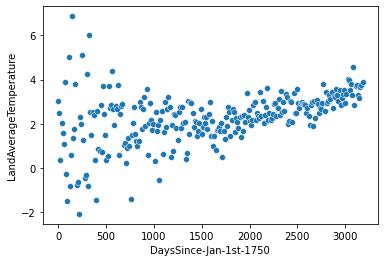

In [19]:
sns.scatterplot(data=global_temp_DF[global_temp_DF['month'] == 1]['LandAverageTemperature'])
plt.xlabel('DaysSince-Jan-1st-1750')
plt.show()

In [ ]:
yerr1=global_temp_DF[global_temp_DF['month'] == 1]['LandAverageTemperatureUncertainty']
plt.figure(figsize=(5,5))
plt.errorbar(global_temp_DF[global_temp_DF['month'] == 1]['year'].to_numpy().reshape(266,1),yhat.reshape(266,1),yerr=yerr1,ecolor='red',color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=5) 
plt.xlabel('Year')
plt.ylabel('Temperture')
plt.show()

In [241]:
global_temp_DF.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'year', 'month'],
      dtype='object')

### We can see the high degree of uncertainty contained in the Temp data for historical recordings 


In the plot below we can see the raw data plotted with the hue set to the month, as expected

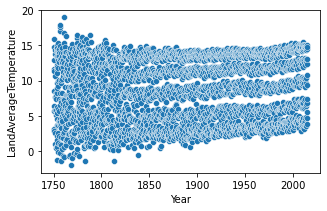

In [825]:
plt.figure(figsize=(5,3))

dfraw = pd.read_csv('GlobalTemperatures.csv',parse_dates=['dt'], date_parser=dt_parse)


dfraw['year'] = dfraw['dt'].dt.year
sns.scatterplot(data=dfraw,x='year',y='LandAverageTemperature',palette='gist_earth_r')
plt.xlabel('Year')
plt.show()

C:\Users\austi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


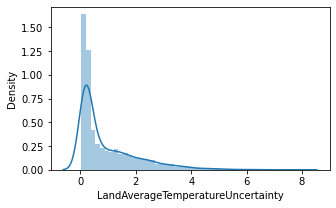

In [144]:
plt.figure(figsize=(5,3))
sns.distplot(global_temp_DF['LandAverageTemperatureUncertainty'])
#plt.title('Temp Uncertainty in degrees C')
plt.show()


In [244]:
for years in global_temp_DF['year']:
    mean_yearly = global_temp_DF.loc[global_temp_DF['year']==years,'LandAverageTemperature'].mean()
    #print(mean_yearly)
    global_temp_DF.loc[global_temp_DF['year']==years,'meantemp'] = mean_yearly

#global_temp_DF[] = df.iloc[:,1].rolling(window=3).mean()

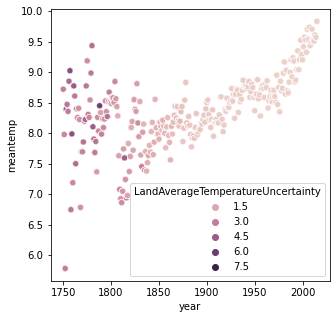

In [245]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=global_temp_DF,x='year',y='meantemp',hue='LandAverageTemperatureUncertainty')
plt.show()

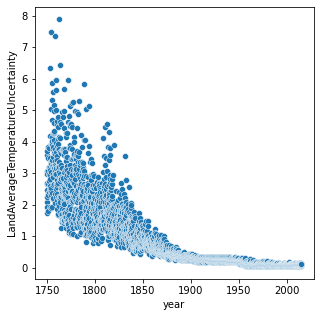

In [246]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=global_temp_DF,x='year',y='LandAverageTemperatureUncertainty',palette='gist_earth_r')
plt.show()

In [336]:
global_temp_DF = global_temp_DF[global_temp_DF['year'] >= 1850]

### Before we model anything using the global temp data we need to average data using a rolling average possibly every 2 months or larger this will be tested... 

In [337]:
global_temp_DF['SMA12'] = global_temp_DF.iloc[:,1].rolling(window=12).mean()
global_temp_DF['SMA3'] =  global_temp_DF.iloc[:,1].rolling(window=3).mean()

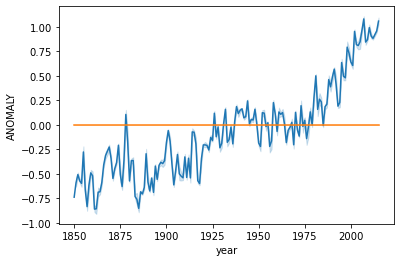

In [338]:
baseline = global_temp_DF[np.logical_and(global_temp_DF['year'] > 1950 , global_temp_DF['year'] < 1980)]['SMA12'].mean()
global_temp_DF['ANOMALY'] = global_temp_DF['SMA12'] - baseline
global_temp_DF['zero'] = 0
sns.lineplot(data=global_temp_DF,x='year',y='ANOMALY')
sns.lineplot(data=global_temp_DF,x='year',y='zero')
#sns.lineplot(data=global_temp_DF['SMA3'])
#sns.lineplot(data=global_temp_DF['LandAverageTemperature'])
plt.show()

In [357]:
min_change = 0
max_change = 0
for  year in global_temp_DF['year']: 
    
    changeyr = global_temp_DF[global_temp_DF['year']==year]['ANOMALY'].mean()-global_temp_DF[global_temp_DF['year']==(year-5)]['ANOMALY'].mean()
    
    
    if changeyr < min_change:
        min_change =  changeyr
        minchngyr  = year
        
    if changeyr > max_change:
        max_change = changeyr 
        maxchngyr = year

In [358]:
print('biggest negative drop in temp over 5yr: ',min_change)
print(minchngyr)

print('biggest increase in temp over 5yr: ',max_change)
print(maxchngyr)


biggest negative drop in temp over 5yr:  -0.8373749999999969
1883
biggest increase in temp over 5yr:  0.6406180555555573
1981


^ THIS LOOKS MORE LIKE IT, WE HAVE SMOOTHED OUT SOME OF THE VARIANCE SEEN IN THE DATA PLOTTED MONTHLY AND WE CAN NOW BEGIN TO MODEL!!!

        - Because we have used a 12 month smoother we are not capturing the seasonal variations in temp data

FROM  VISUAL ANALYSIS OF THE PLOT ABOVE WE CAN SEE A CHANGE IN GRADIENT (RATE OF CLIMATE CHAGE) ~ ROUGHLY LOC 2750... where we see a large deviation from the baseline (1950 - 1980) 

### For modelling data will be split before and after year 2000, to see if we can predict the increase in temp of the 2000's using the two chosen methods for modelling

In [6]:
#train = global_temp_DF[global_temp_DF['year']<2000]['ANOMALY'].to_numpy()
#test  = global_temp_DF[global_temp_DF['year']>=2000]['ANOMALY'].to_numpy()

global_temp_DF[global_temp_DF['dt']=='2000-01-01']
dout = global_temp_DF['ANOMALY'].to_numpy()

In [7]:
global_temp_DF.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month,SMA12,SMA3,ANOMALY,zero
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015,8,9.683750,14.770333,1.044417,0
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015,9,9.676083,14.268333,1.036751,0
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015,10,9.715333,12.851667,1.076001,0
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015,11,9.775333,10.411000,1.136001,0
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062,2015,12,9.831000,7.917333,1.191667,0


In [8]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(dout.reshape(len(dout),1))


dmodelling = min_max_scaler.transform(dout.reshape(len(dout),1))



In [9]:
dmodelling = dmodelling[11:] # We dont want the first year as it NaN's... for a train test split we need data before 2000


# data goes until End of Dec 2015 which is 15 full years with monthly recordings of temp = 15*12 = 18
# We train on everything preceeding 2000 and validation occurs on data after 2000

dtrain     = dmodelling[:(len(dmodelling)-181)]
dval       = dmodelling[(len(dmodelling)-180):]

print(dtrain.shape)
print(dval.shape)
print(dmodelling.shape)

(1800, 1)
(180, 1)
(1981, 1)


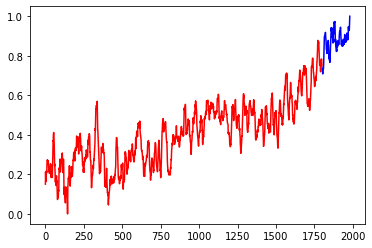

In [10]:
x1 = np.arange(len(dtrain))
x2 = np.arange(len(dtrain)+1,len(dmodelling))

x1 = x1.reshape(len(dtrain),1)
x2 = x2.reshape(len(dval),1)


plt.plot(x1, dtrain, 'r', x2, dval, 'b')
plt.show()



In [369]:
regr3 =  linear_model.LinearRegression()

In [376]:
regr3.fit(x1,dtrain)
train_est = regr3.predict(x1)

test_est  = regr3.predict(x2)

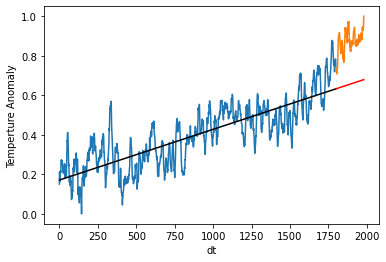

In [402]:

plt.plot(x1,dtrain,x2,dval)
plt.plot(x1,train_est,'-k')
plt.plot(x2,test_est,'-r')
plt.ylabel('Temperture Anomaly')
plt.xlabel('dt')
plt.show()

In [382]:
print(r2_score(dtrain,train_est))
print(r2_score(dval,test_est))

0.6848628743872696
-14.84921793203603


### Deep Learning Approach:

### LSTM MODEL:

In [429]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 12, 50)            10400     
_________________________________________________________________
lstm_53 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [430]:
history = model.fit(train_data, train_y, epochs=20, verbose=1)


Epoch 1/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0345
Epoch 2/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0035
Epoch 3/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 4/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 5/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 6/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 7/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 8/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 9/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 10/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 11/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 12/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 13/20
55/55 [==============================

In [431]:
loss = model.evaluate(train_data, train_y, verbose=0)
print(loss)

0.0007996007334440947


In [435]:
predictions = model.predict(x2, verbose=1)
predictions = predictions.reshape(predictions.shape[0])


ValueError: in user code:

    C:\Users\austi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\austi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\austi\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\austi\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\austi\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\austi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\austi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\austi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\austi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:176 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_27 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 1]


#### Model Fit on the training data using a Neural Network with LSTM layers

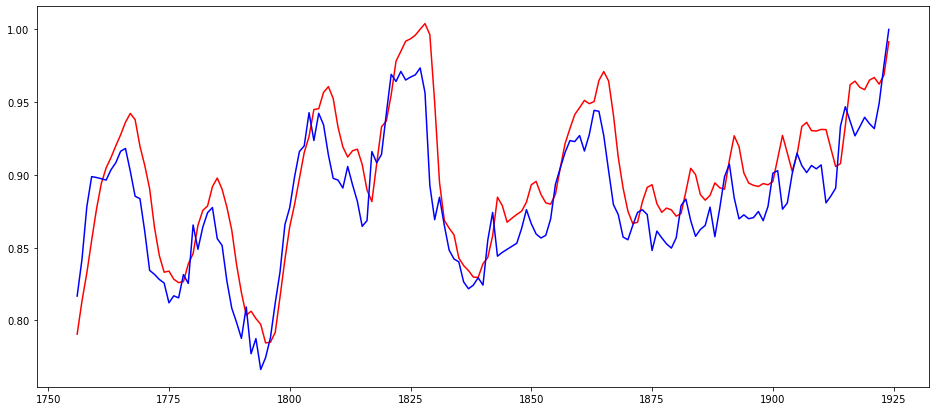

In [418]:
fig = plt.figure(figsize=(16, 7))
plt.plot(y2, predictions, 'r', y2, test_y, 'b')
plt.show()

- Model Fits data well

- Does not predict with accuracy 

Low Bias / High Variance Method as does not match the test well but fits the training data

### ARIMA APPROACH:

based roughly on https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [449]:
from statsmodels.tsa.arima.model import ARIMA

In [450]:
model = ARIMA(dtrain, order=(5,1,0))
model_fit = model.fit()

In [451]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1800
Model:                 ARIMA(5, 1, 0)   Log Likelihood                4827.029
Date:                Sat, 19 Dec 2020   AIC                          -9642.058
Time:                        15:40:12   BIC                          -9609.088
Sample:                             0   HQIC                         -9629.888
                               - 1800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3284      0.020     16.741      0.000       0.290       0.367
ar.L2          0.0488      0.023      2.093      0.036       0.003       0.095
ar.L3          0.0431      0.024      1.808      0.0

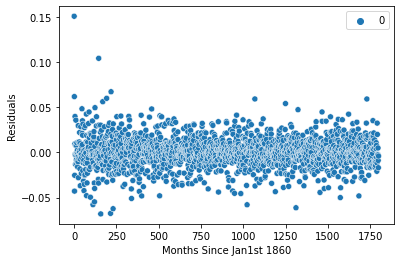

In [452]:
residuals = pd.DataFrame(model_fit.resid)
sns.scatterplot(data=residuals)
plt.xlabel('Months Since Jan1st 1860')
plt.ylabel('Residuals')
plt.show()

C:\Users\austi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



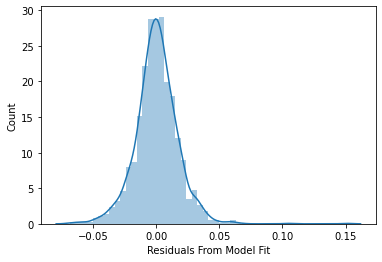

In [453]:
residuals = pd.DataFrame(model_fit.resid)
sns.distplot(residuals)
plt.xlabel('Residuals From Model Fit')
plt.ylabel('Count')
plt.show()

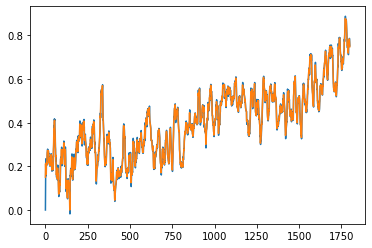

In [455]:
model_fit.predict()
plt.plot(x1,model_fit.predict(),x1,dtrain)
plt.show()

In [457]:
print(model_fit.forecast()) #First Prediction Based On ARIMA 
print(dval[0])            #True Value 

[0.74425032]
[0.73699072]


ARIMA forward walking prediction method:

In [470]:
previous_steps = dtrain
test_est       = []



for t in range(len(dval)):
    
    
    model2 = ARIMA(previous_steps[-50:-1], order=(5,3,0))
    model_fit = model2.fit()
    yhat = model_fit.forecast()
    print(yhat)
    np.append(previous_steps,yhat)
    test_est.append(yhat)
    
  
# evaluate forecasts
MSE= mean_squared_error(dval, test_est)


# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(test_est, color='red')
plt.show()

C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



[0.73622351]
[0.73622351]


C:\Users\austi\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



KeyboardInterrupt: 

### USING ARIMA has not worked 

using same approach of walkforward validation but with the Neural Network


In [408]:
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

previous_steps = dtrain
test_est       = []



def ANN1():
    
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=499))
    model.add(Dense(100, activation='relu', input_dim=100))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model


model_avg = np.zeros([180,10])

#loop through 1o iterations of model
for i in range(10):
    
    #ANN Outputs only 1 variable, so we slide window after each prediction after we store value to array
    for t in range(len(dval)):
    
    
    #model2 = ARIMA(previous_steps, order=(5,1,0))
    #model_fit = model2.fit()
    #yhat = model_fit.forecast()
    #print(yhat)
    #previous_steps.append(yhat)
    #test_est.append(yhat)
    
    
        train_x1, train_y1 = previous_steps[-500:-1].reshape(1,499), previous_steps[-1].reshape(1,1)
    
    
        model = ANN1()
    
    
        model.fit(train_x1, train_y1, epochs=50,verbose=0) 
    
    
        yhat = model.predict(train_x1, verbose=0)
    
        #print(yhat)
    

        previous_steps = np.append(previous_steps,yhat)
        
        model_avg[t,i] = yhat 
        
        print(t,' Steps past the training data')


0  Steps past the training data
1  Steps past the training data
2  Steps past the training data
3  Steps past the training data
4  Steps past the training data
5  Steps past the training data
6  Steps past the training data
7  Steps past the training data
8  Steps past the training data
9  Steps past the training data


10  Steps past the training data
11  Steps past the training data
12  Steps past the training data
13  Steps past the training data
14  Steps past the training data
15  Steps past the training data
16  Steps past the training data
17  Steps past the training data
18  Steps past the training data
19  Steps past the training data
20  Steps past the training data


21  Steps past the training data
22  Steps past the training data
23  Steps past the training data
24  Steps past the training data
25  Steps past the training data
26  Steps past the training data
27  Steps past the training data
28  Steps past the training data
29  Steps past the training data
30  Steps past the training data
31  Steps past the training data


32  Steps past the training data
33  Steps past the training data
34  Steps past the training data
35  Steps past the training data
36  Steps past the training data
37  Steps past the training data
38  Steps past the training data
39  Steps past the training data
40  Steps past the training data
41  Steps past the training data
42  Steps past the training data


43  Steps past the training data
44  Steps past the training data
45  Steps past the training data
46  Steps past the training data
47  Steps past the training data
48  Steps past the training data
49  Steps past the training data
50  Steps past the training data
51  Steps past the training data
52  Steps past the training data
53  Steps past the training data


54  Steps past the training data
55  Steps past the training data
56  Steps past the training data
57  Steps past the training data
58  Steps past the training data
59  Steps past the training data
60  Steps past the training data
61  Steps past the training data
62  Steps past the training data
63  Steps past the training data
64  Steps past the training data


65  Steps past the training data
66  Steps past the training data
67  Steps past the training data
68  Steps past the training data
69  Steps past the training data
70  Steps past the training data
71  Steps past the training data
72  Steps past the training data
73  Steps past the training data
74  Steps past the training data
75  Steps past the training data


76  Steps past the training data
77  Steps past the training data
78  Steps past the training data
79  Steps past the training data
80  Steps past the training data
81  Steps past the training data
82  Steps past the training data
83  Steps past the training data
84  Steps past the training data
85  Steps past the training data
86  Steps past the training data


87  Steps past the training data
88  Steps past the training data
89  Steps past the training data
90  Steps past the training data
91  Steps past the training data
92  Steps past the training data
93  Steps past the training data
94  Steps past the training data
95  Steps past the training data
96  Steps past the training data
97  Steps past the training data


98  Steps past the training data
99  Steps past the training data
100  Steps past the training data
101  Steps past the training data
102  Steps past the training data
103  Steps past the training data
104  Steps past the training data
105  Steps past the training data
106  Steps past the training data
107  Steps past the training data
108  Steps past the training data


109  Steps past the training data
110  Steps past the training data
111  Steps past the training data
112  Steps past the training data
113  Steps past the training data
114  Steps past the training data
115  Steps past the training data
116  Steps past the training data
117  Steps past the training data
118  Steps past the training data
119  Steps past the training data


120  Steps past the training data
121  Steps past the training data
122  Steps past the training data
123  Steps past the training data
124  Steps past the training data
125  Steps past the training data
126  Steps past the training data
127  Steps past the training data
128  Steps past the training data
129  Steps past the training data
130  Steps past the training data


131  Steps past the training data
132  Steps past the training data
133  Steps past the training data
134  Steps past the training data
135  Steps past the training data
136  Steps past the training data
137  Steps past the training data
138  Steps past the training data
139  Steps past the training data
140  Steps past the training data
141  Steps past the training data


142  Steps past the training data
143  Steps past the training data
144  Steps past the training data
145  Steps past the training data
146  Steps past the training data
147  Steps past the training data
148  Steps past the training data
149  Steps past the training data
150  Steps past the training data
151  Steps past the training data
152  Steps past the training data


153  Steps past the training data
154  Steps past the training data
155  Steps past the training data
156  Steps past the training data
157  Steps past the training data
158  Steps past the training data
159  Steps past the training data
160  Steps past the training data
161  Steps past the training data
162  Steps past the training data
163  Steps past the training data


164  Steps past the training data
165  Steps past the training data
166  Steps past the training data
167  Steps past the training data
168  Steps past the training data
169  Steps past the training data
170  Steps past the training data
171  Steps past the training data
172  Steps past the training data
173  Steps past the training data
174  Steps past the training data


175  Steps past the training data
176  Steps past the training data
177  Steps past the training data
178  Steps past the training data
179  Steps past the training data
0  Steps past the training data
1  Steps past the training data
2  Steps past the training data
3  Steps past the training data
4  Steps past the training data
5  Steps past the training data


6  Steps past the training data
7  Steps past the training data
8  Steps past the training data
9  Steps past the training data
10  Steps past the training data
11  Steps past the training data
12  Steps past the training data
13  Steps past the training data
14  Steps past the training data
15  Steps past the training data
16  Steps past the training data


17  Steps past the training data
18  Steps past the training data
19  Steps past the training data
20  Steps past the training data
21  Steps past the training data
22  Steps past the training data
23  Steps past the training data
24  Steps past the training data
25  Steps past the training data
26  Steps past the training data
27  Steps past the training data


28  Steps past the training data
29  Steps past the training data
30  Steps past the training data
31  Steps past the training data
32  Steps past the training data
33  Steps past the training data
34  Steps past the training data
35  Steps past the training data
36  Steps past the training data
37  Steps past the training data
38  Steps past the training data


39  Steps past the training data
40  Steps past the training data
41  Steps past the training data
42  Steps past the training data
43  Steps past the training data
44  Steps past the training data
45  Steps past the training data
46  Steps past the training data
47  Steps past the training data
48  Steps past the training data
49  Steps past the training data


50  Steps past the training data
51  Steps past the training data
52  Steps past the training data
53  Steps past the training data
54  Steps past the training data
55  Steps past the training data
56  Steps past the training data
57  Steps past the training data
58  Steps past the training data
59  Steps past the training data
60  Steps past the training data


61  Steps past the training data
62  Steps past the training data
63  Steps past the training data
64  Steps past the training data
65  Steps past the training data
66  Steps past the training data
67  Steps past the training data
68  Steps past the training data
69  Steps past the training data
70  Steps past the training data
71  Steps past the training data


72  Steps past the training data
73  Steps past the training data
74  Steps past the training data
75  Steps past the training data
76  Steps past the training data
77  Steps past the training data
78  Steps past the training data
79  Steps past the training data
80  Steps past the training data
81  Steps past the training data
82  Steps past the training data


83  Steps past the training data
84  Steps past the training data
85  Steps past the training data
86  Steps past the training data
87  Steps past the training data
88  Steps past the training data
89  Steps past the training data
90  Steps past the training data
91  Steps past the training data
92  Steps past the training data
93  Steps past the training data


94  Steps past the training data
95  Steps past the training data
96  Steps past the training data
97  Steps past the training data
98  Steps past the training data
99  Steps past the training data
100  Steps past the training data
101  Steps past the training data
102  Steps past the training data
103  Steps past the training data
104  Steps past the training data


105  Steps past the training data
106  Steps past the training data
107  Steps past the training data
108  Steps past the training data
109  Steps past the training data
110  Steps past the training data
111  Steps past the training data
112  Steps past the training data
113  Steps past the training data
114  Steps past the training data
115  Steps past the training data


116  Steps past the training data
117  Steps past the training data
118  Steps past the training data
119  Steps past the training data
120  Steps past the training data
121  Steps past the training data
122  Steps past the training data
123  Steps past the training data
124  Steps past the training data
125  Steps past the training data
126  Steps past the training data


127  Steps past the training data
128  Steps past the training data
129  Steps past the training data
130  Steps past the training data
131  Steps past the training data
132  Steps past the training data
133  Steps past the training data
134  Steps past the training data
135  Steps past the training data
136  Steps past the training data
137  Steps past the training data


138  Steps past the training data
139  Steps past the training data
140  Steps past the training data
141  Steps past the training data
142  Steps past the training data
143  Steps past the training data
144  Steps past the training data
145  Steps past the training data
146  Steps past the training data
147  Steps past the training data
148  Steps past the training data


149  Steps past the training data
150  Steps past the training data
151  Steps past the training data
152  Steps past the training data
153  Steps past the training data
154  Steps past the training data
155  Steps past the training data
156  Steps past the training data
157  Steps past the training data
158  Steps past the training data
159  Steps past the training data


160  Steps past the training data
161  Steps past the training data
162  Steps past the training data
163  Steps past the training data
164  Steps past the training data
165  Steps past the training data
166  Steps past the training data
167  Steps past the training data
168  Steps past the training data
169  Steps past the training data
170  Steps past the training data


171  Steps past the training data
172  Steps past the training data
173  Steps past the training data
174  Steps past the training data
175  Steps past the training data
176  Steps past the training data
177  Steps past the training data
178  Steps past the training data
179  Steps past the training data
0  Steps past the training data
1  Steps past the training data


2  Steps past the training data
3  Steps past the training data
4  Steps past the training data
5  Steps past the training data
6  Steps past the training data
7  Steps past the training data
8  Steps past the training data
9  Steps past the training data
10  Steps past the training data
11  Steps past the training data
12  Steps past the training data


13  Steps past the training data
14  Steps past the training data
15  Steps past the training data
16  Steps past the training data
17  Steps past the training data
18  Steps past the training data
19  Steps past the training data
20  Steps past the training data
21  Steps past the training data
22  Steps past the training data
23  Steps past the training data


24  Steps past the training data
25  Steps past the training data
26  Steps past the training data
27  Steps past the training data
28  Steps past the training data
29  Steps past the training data
30  Steps past the training data
31  Steps past the training data
32  Steps past the training data
33  Steps past the training data
34  Steps past the training data


35  Steps past the training data
36  Steps past the training data
37  Steps past the training data
38  Steps past the training data
39  Steps past the training data
40  Steps past the training data
41  Steps past the training data
42  Steps past the training data
43  Steps past the training data
44  Steps past the training data
45  Steps past the training data


46  Steps past the training data
47  Steps past the training data
48  Steps past the training data
49  Steps past the training data
50  Steps past the training data
51  Steps past the training data
52  Steps past the training data
53  Steps past the training data
54  Steps past the training data
55  Steps past the training data
56  Steps past the training data


57  Steps past the training data
58  Steps past the training data
59  Steps past the training data
60  Steps past the training data
61  Steps past the training data
62  Steps past the training data
63  Steps past the training data
64  Steps past the training data
65  Steps past the training data
66  Steps past the training data
67  Steps past the training data


68  Steps past the training data
69  Steps past the training data
70  Steps past the training data
71  Steps past the training data
72  Steps past the training data
73  Steps past the training data
74  Steps past the training data
75  Steps past the training data
76  Steps past the training data
77  Steps past the training data
78  Steps past the training data


79  Steps past the training data
80  Steps past the training data
81  Steps past the training data
82  Steps past the training data
83  Steps past the training data
84  Steps past the training data
85  Steps past the training data
86  Steps past the training data
87  Steps past the training data
88  Steps past the training data
89  Steps past the training data


90  Steps past the training data
91  Steps past the training data
92  Steps past the training data
93  Steps past the training data
94  Steps past the training data
95  Steps past the training data
96  Steps past the training data
97  Steps past the training data
98  Steps past the training data
99  Steps past the training data
100  Steps past the training data


101  Steps past the training data
102  Steps past the training data
103  Steps past the training data
104  Steps past the training data
105  Steps past the training data
106  Steps past the training data
107  Steps past the training data
108  Steps past the training data
109  Steps past the training data
110  Steps past the training data
111  Steps past the training data


112  Steps past the training data
113  Steps past the training data
114  Steps past the training data
115  Steps past the training data
116  Steps past the training data
117  Steps past the training data
118  Steps past the training data
119  Steps past the training data
120  Steps past the training data
121  Steps past the training data
122  Steps past the training data


123  Steps past the training data
124  Steps past the training data
125  Steps past the training data
126  Steps past the training data
127  Steps past the training data
128  Steps past the training data
129  Steps past the training data
130  Steps past the training data
131  Steps past the training data
132  Steps past the training data
133  Steps past the training data


134  Steps past the training data
135  Steps past the training data
136  Steps past the training data
137  Steps past the training data
138  Steps past the training data
139  Steps past the training data
140  Steps past the training data
141  Steps past the training data
142  Steps past the training data
143  Steps past the training data
144  Steps past the training data


145  Steps past the training data
146  Steps past the training data
147  Steps past the training data
148  Steps past the training data
149  Steps past the training data
150  Steps past the training data
151  Steps past the training data
152  Steps past the training data
153  Steps past the training data
154  Steps past the training data
155  Steps past the training data


156  Steps past the training data
157  Steps past the training data
158  Steps past the training data
159  Steps past the training data
160  Steps past the training data
161  Steps past the training data
162  Steps past the training data
163  Steps past the training data
164  Steps past the training data
165  Steps past the training data
166  Steps past the training data


167  Steps past the training data
168  Steps past the training data
169  Steps past the training data
170  Steps past the training data
171  Steps past the training data
172  Steps past the training data
173  Steps past the training data
174  Steps past the training data
175  Steps past the training data
176  Steps past the training data
177  Steps past the training data


178  Steps past the training data
179  Steps past the training data
0  Steps past the training data
1  Steps past the training data
2  Steps past the training data
3  Steps past the training data
4  Steps past the training data
5  Steps past the training data
6  Steps past the training data
7  Steps past the training data
8  Steps past the training data


9  Steps past the training data
10  Steps past the training data
11  Steps past the training data
12  Steps past the training data
13  Steps past the training data
14  Steps past the training data
15  Steps past the training data
16  Steps past the training data
17  Steps past the training data
18  Steps past the training data
19  Steps past the training data


20  Steps past the training data
21  Steps past the training data
22  Steps past the training data
23  Steps past the training data
24  Steps past the training data
25  Steps past the training data
26  Steps past the training data
27  Steps past the training data
28  Steps past the training data
29  Steps past the training data
30  Steps past the training data


31  Steps past the training data
32  Steps past the training data
33  Steps past the training data
34  Steps past the training data
35  Steps past the training data
36  Steps past the training data
37  Steps past the training data
38  Steps past the training data
39  Steps past the training data
40  Steps past the training data
41  Steps past the training data


42  Steps past the training data
43  Steps past the training data
44  Steps past the training data
45  Steps past the training data
46  Steps past the training data
47  Steps past the training data
48  Steps past the training data
49  Steps past the training data
50  Steps past the training data
51  Steps past the training data
52  Steps past the training data


53  Steps past the training data
54  Steps past the training data
55  Steps past the training data
56  Steps past the training data
57  Steps past the training data
58  Steps past the training data
59  Steps past the training data
60  Steps past the training data
61  Steps past the training data
62  Steps past the training data
63  Steps past the training data


64  Steps past the training data
65  Steps past the training data
66  Steps past the training data
67  Steps past the training data
68  Steps past the training data
69  Steps past the training data
70  Steps past the training data
71  Steps past the training data
72  Steps past the training data
73  Steps past the training data
74  Steps past the training data


75  Steps past the training data
76  Steps past the training data
77  Steps past the training data
78  Steps past the training data
79  Steps past the training data
80  Steps past the training data
81  Steps past the training data
82  Steps past the training data
83  Steps past the training data
84  Steps past the training data
85  Steps past the training data


86  Steps past the training data
87  Steps past the training data
88  Steps past the training data
89  Steps past the training data
90  Steps past the training data
91  Steps past the training data
92  Steps past the training data
93  Steps past the training data
94  Steps past the training data
95  Steps past the training data
96  Steps past the training data


97  Steps past the training data
98  Steps past the training data
99  Steps past the training data
100  Steps past the training data
101  Steps past the training data
102  Steps past the training data
103  Steps past the training data
104  Steps past the training data
105  Steps past the training data
106  Steps past the training data
107  Steps past the training data


108  Steps past the training data
109  Steps past the training data
110  Steps past the training data
111  Steps past the training data
112  Steps past the training data
113  Steps past the training data
114  Steps past the training data
115  Steps past the training data
116  Steps past the training data
117  Steps past the training data
118  Steps past the training data


119  Steps past the training data
120  Steps past the training data
121  Steps past the training data
122  Steps past the training data
123  Steps past the training data
124  Steps past the training data
125  Steps past the training data
126  Steps past the training data
127  Steps past the training data
128  Steps past the training data
129  Steps past the training data


130  Steps past the training data
131  Steps past the training data
132  Steps past the training data
133  Steps past the training data
134  Steps past the training data
135  Steps past the training data
136  Steps past the training data
137  Steps past the training data
138  Steps past the training data
139  Steps past the training data
140  Steps past the training data


141  Steps past the training data
142  Steps past the training data
143  Steps past the training data
144  Steps past the training data
145  Steps past the training data
146  Steps past the training data
147  Steps past the training data
148  Steps past the training data
149  Steps past the training data
150  Steps past the training data
151  Steps past the training data


152  Steps past the training data
153  Steps past the training data
154  Steps past the training data
155  Steps past the training data
156  Steps past the training data
157  Steps past the training data
158  Steps past the training data
159  Steps past the training data
160  Steps past the training data
161  Steps past the training data
162  Steps past the training data


163  Steps past the training data
164  Steps past the training data
165  Steps past the training data
166  Steps past the training data
167  Steps past the training data
168  Steps past the training data
169  Steps past the training data
170  Steps past the training data
171  Steps past the training data
172  Steps past the training data
173  Steps past the training data


174  Steps past the training data
175  Steps past the training data
176  Steps past the training data
177  Steps past the training data
178  Steps past the training data
179  Steps past the training data
0  Steps past the training data
1  Steps past the training data
2  Steps past the training data
3  Steps past the training data
4  Steps past the training data


5  Steps past the training data
6  Steps past the training data
7  Steps past the training data
8  Steps past the training data
9  Steps past the training data
10  Steps past the training data
11  Steps past the training data
12  Steps past the training data
13  Steps past the training data
14  Steps past the training data
15  Steps past the training data


16  Steps past the training data
17  Steps past the training data
18  Steps past the training data
19  Steps past the training data
20  Steps past the training data
21  Steps past the training data
22  Steps past the training data
23  Steps past the training data
24  Steps past the training data
25  Steps past the training data
26  Steps past the training data


27  Steps past the training data
28  Steps past the training data
29  Steps past the training data
30  Steps past the training data
31  Steps past the training data
32  Steps past the training data
33  Steps past the training data
34  Steps past the training data
35  Steps past the training data
36  Steps past the training data
37  Steps past the training data


38  Steps past the training data
39  Steps past the training data
40  Steps past the training data
41  Steps past the training data
42  Steps past the training data
43  Steps past the training data
44  Steps past the training data
45  Steps past the training data
46  Steps past the training data
47  Steps past the training data
48  Steps past the training data


49  Steps past the training data
50  Steps past the training data
51  Steps past the training data
52  Steps past the training data
53  Steps past the training data
54  Steps past the training data
55  Steps past the training data
56  Steps past the training data
57  Steps past the training data
58  Steps past the training data
59  Steps past the training data


60  Steps past the training data
61  Steps past the training data
62  Steps past the training data
63  Steps past the training data
64  Steps past the training data
65  Steps past the training data
66  Steps past the training data
67  Steps past the training data
68  Steps past the training data
69  Steps past the training data
70  Steps past the training data


71  Steps past the training data
72  Steps past the training data
73  Steps past the training data
74  Steps past the training data
75  Steps past the training data
76  Steps past the training data
77  Steps past the training data
78  Steps past the training data
79  Steps past the training data
80  Steps past the training data
81  Steps past the training data


82  Steps past the training data
83  Steps past the training data
84  Steps past the training data
85  Steps past the training data
86  Steps past the training data
87  Steps past the training data
88  Steps past the training data
89  Steps past the training data
90  Steps past the training data
91  Steps past the training data
92  Steps past the training data


93  Steps past the training data
94  Steps past the training data
95  Steps past the training data
96  Steps past the training data
97  Steps past the training data
98  Steps past the training data
99  Steps past the training data
100  Steps past the training data
101  Steps past the training data
102  Steps past the training data
103  Steps past the training data


104  Steps past the training data
105  Steps past the training data
106  Steps past the training data
107  Steps past the training data
108  Steps past the training data
109  Steps past the training data
110  Steps past the training data
111  Steps past the training data
112  Steps past the training data
113  Steps past the training data
114  Steps past the training data


115  Steps past the training data
116  Steps past the training data
117  Steps past the training data
118  Steps past the training data
119  Steps past the training data
120  Steps past the training data
121  Steps past the training data
122  Steps past the training data
123  Steps past the training data
124  Steps past the training data
125  Steps past the training data


126  Steps past the training data
127  Steps past the training data
128  Steps past the training data
129  Steps past the training data
130  Steps past the training data
131  Steps past the training data
132  Steps past the training data
133  Steps past the training data
134  Steps past the training data
135  Steps past the training data
136  Steps past the training data


137  Steps past the training data
138  Steps past the training data
139  Steps past the training data
140  Steps past the training data
141  Steps past the training data
142  Steps past the training data
143  Steps past the training data
144  Steps past the training data
145  Steps past the training data
146  Steps past the training data
147  Steps past the training data


148  Steps past the training data
149  Steps past the training data
150  Steps past the training data
151  Steps past the training data
152  Steps past the training data
153  Steps past the training data
154  Steps past the training data
155  Steps past the training data
156  Steps past the training data
157  Steps past the training data
158  Steps past the training data


159  Steps past the training data
160  Steps past the training data
161  Steps past the training data
162  Steps past the training data
163  Steps past the training data
164  Steps past the training data
165  Steps past the training data
166  Steps past the training data
167  Steps past the training data
168  Steps past the training data
169  Steps past the training data


170  Steps past the training data
171  Steps past the training data
172  Steps past the training data
173  Steps past the training data
174  Steps past the training data
175  Steps past the training data
176  Steps past the training data
177  Steps past the training data
178  Steps past the training data
179  Steps past the training data
0  Steps past the training data


1  Steps past the training data
2  Steps past the training data
3  Steps past the training data
4  Steps past the training data
5  Steps past the training data
6  Steps past the training data
7  Steps past the training data
8  Steps past the training data
9  Steps past the training data
10  Steps past the training data
11  Steps past the training data


12  Steps past the training data
13  Steps past the training data
14  Steps past the training data
15  Steps past the training data
16  Steps past the training data
17  Steps past the training data
18  Steps past the training data
19  Steps past the training data
20  Steps past the training data
21  Steps past the training data
22  Steps past the training data


23  Steps past the training data
24  Steps past the training data
25  Steps past the training data
26  Steps past the training data
27  Steps past the training data
28  Steps past the training data
29  Steps past the training data
30  Steps past the training data
31  Steps past the training data
32  Steps past the training data
33  Steps past the training data


34  Steps past the training data
35  Steps past the training data
36  Steps past the training data
37  Steps past the training data
38  Steps past the training data
39  Steps past the training data
40  Steps past the training data
41  Steps past the training data
42  Steps past the training data
43  Steps past the training data
44  Steps past the training data


45  Steps past the training data
46  Steps past the training data
47  Steps past the training data
48  Steps past the training data
49  Steps past the training data
50  Steps past the training data
51  Steps past the training data
52  Steps past the training data
53  Steps past the training data
54  Steps past the training data
55  Steps past the training data


56  Steps past the training data
57  Steps past the training data
58  Steps past the training data
59  Steps past the training data
60  Steps past the training data
61  Steps past the training data
62  Steps past the training data
63  Steps past the training data
64  Steps past the training data
65  Steps past the training data
66  Steps past the training data


67  Steps past the training data
68  Steps past the training data
69  Steps past the training data
70  Steps past the training data
71  Steps past the training data
72  Steps past the training data
73  Steps past the training data
74  Steps past the training data
75  Steps past the training data
76  Steps past the training data
77  Steps past the training data


78  Steps past the training data
79  Steps past the training data
80  Steps past the training data
81  Steps past the training data
82  Steps past the training data
83  Steps past the training data
84  Steps past the training data
85  Steps past the training data
86  Steps past the training data
87  Steps past the training data
88  Steps past the training data


89  Steps past the training data
90  Steps past the training data
91  Steps past the training data
92  Steps past the training data
93  Steps past the training data
94  Steps past the training data
95  Steps past the training data
96  Steps past the training data
97  Steps past the training data
98  Steps past the training data
99  Steps past the training data


100  Steps past the training data
101  Steps past the training data
102  Steps past the training data
103  Steps past the training data
104  Steps past the training data
105  Steps past the training data
106  Steps past the training data
107  Steps past the training data
108  Steps past the training data
109  Steps past the training data
110  Steps past the training data


111  Steps past the training data
112  Steps past the training data
113  Steps past the training data
114  Steps past the training data
115  Steps past the training data
116  Steps past the training data
117  Steps past the training data
118  Steps past the training data
119  Steps past the training data
120  Steps past the training data
121  Steps past the training data


122  Steps past the training data
123  Steps past the training data
124  Steps past the training data
125  Steps past the training data
126  Steps past the training data
127  Steps past the training data
128  Steps past the training data
129  Steps past the training data
130  Steps past the training data
131  Steps past the training data
132  Steps past the training data


133  Steps past the training data
134  Steps past the training data
135  Steps past the training data
136  Steps past the training data
137  Steps past the training data
138  Steps past the training data
139  Steps past the training data
140  Steps past the training data
141  Steps past the training data
142  Steps past the training data
143  Steps past the training data


144  Steps past the training data
145  Steps past the training data
146  Steps past the training data
147  Steps past the training data
148  Steps past the training data
149  Steps past the training data
150  Steps past the training data
151  Steps past the training data
152  Steps past the training data
153  Steps past the training data
154  Steps past the training data


155  Steps past the training data
156  Steps past the training data
157  Steps past the training data
158  Steps past the training data
159  Steps past the training data
160  Steps past the training data
161  Steps past the training data
162  Steps past the training data
163  Steps past the training data
164  Steps past the training data
165  Steps past the training data


166  Steps past the training data
167  Steps past the training data
168  Steps past the training data
169  Steps past the training data
170  Steps past the training data
171  Steps past the training data
172  Steps past the training data
173  Steps past the training data
174  Steps past the training data
175  Steps past the training data
176  Steps past the training data


177  Steps past the training data
178  Steps past the training data
179  Steps past the training data
0  Steps past the training data
1  Steps past the training data
2  Steps past the training data
3  Steps past the training data
4  Steps past the training data
5  Steps past the training data
6  Steps past the training data
7  Steps past the training data


8  Steps past the training data
9  Steps past the training data
10  Steps past the training data
11  Steps past the training data
12  Steps past the training data
13  Steps past the training data
14  Steps past the training data
15  Steps past the training data
16  Steps past the training data
17  Steps past the training data
18  Steps past the training data


19  Steps past the training data
20  Steps past the training data
21  Steps past the training data
22  Steps past the training data
23  Steps past the training data
24  Steps past the training data
25  Steps past the training data
26  Steps past the training data
27  Steps past the training data
28  Steps past the training data
29  Steps past the training data


30  Steps past the training data
31  Steps past the training data
32  Steps past the training data
33  Steps past the training data
34  Steps past the training data
35  Steps past the training data
36  Steps past the training data
37  Steps past the training data
38  Steps past the training data
39  Steps past the training data
40  Steps past the training data


41  Steps past the training data
42  Steps past the training data
43  Steps past the training data
44  Steps past the training data
45  Steps past the training data
46  Steps past the training data
47  Steps past the training data
48  Steps past the training data
49  Steps past the training data
50  Steps past the training data
51  Steps past the training data


52  Steps past the training data
53  Steps past the training data
54  Steps past the training data
55  Steps past the training data
56  Steps past the training data
57  Steps past the training data
58  Steps past the training data
59  Steps past the training data
60  Steps past the training data
61  Steps past the training data
62  Steps past the training data


63  Steps past the training data
64  Steps past the training data
65  Steps past the training data
66  Steps past the training data
67  Steps past the training data
68  Steps past the training data
69  Steps past the training data
70  Steps past the training data
71  Steps past the training data
72  Steps past the training data
73  Steps past the training data


74  Steps past the training data
75  Steps past the training data
76  Steps past the training data
77  Steps past the training data
78  Steps past the training data
79  Steps past the training data
80  Steps past the training data
81  Steps past the training data
82  Steps past the training data
83  Steps past the training data
84  Steps past the training data


85  Steps past the training data
86  Steps past the training data
87  Steps past the training data
88  Steps past the training data
89  Steps past the training data
90  Steps past the training data
91  Steps past the training data
92  Steps past the training data
93  Steps past the training data
94  Steps past the training data
95  Steps past the training data


96  Steps past the training data
97  Steps past the training data
98  Steps past the training data
99  Steps past the training data
100  Steps past the training data
101  Steps past the training data
102  Steps past the training data
103  Steps past the training data
104  Steps past the training data
105  Steps past the training data
106  Steps past the training data


107  Steps past the training data
108  Steps past the training data
109  Steps past the training data
110  Steps past the training data
111  Steps past the training data
112  Steps past the training data
113  Steps past the training data
114  Steps past the training data
115  Steps past the training data
116  Steps past the training data
117  Steps past the training data


118  Steps past the training data
119  Steps past the training data
120  Steps past the training data
121  Steps past the training data
122  Steps past the training data
123  Steps past the training data
124  Steps past the training data
125  Steps past the training data
126  Steps past the training data
127  Steps past the training data
128  Steps past the training data


129  Steps past the training data
130  Steps past the training data
131  Steps past the training data
132  Steps past the training data
133  Steps past the training data
134  Steps past the training data
135  Steps past the training data
136  Steps past the training data
137  Steps past the training data
138  Steps past the training data
139  Steps past the training data


140  Steps past the training data
141  Steps past the training data
142  Steps past the training data
143  Steps past the training data
144  Steps past the training data
145  Steps past the training data
146  Steps past the training data
147  Steps past the training data
148  Steps past the training data
149  Steps past the training data
150  Steps past the training data


151  Steps past the training data
152  Steps past the training data
153  Steps past the training data
154  Steps past the training data
155  Steps past the training data
156  Steps past the training data
157  Steps past the training data
158  Steps past the training data
159  Steps past the training data
160  Steps past the training data
161  Steps past the training data


162  Steps past the training data
163  Steps past the training data
164  Steps past the training data
165  Steps past the training data
166  Steps past the training data
167  Steps past the training data
168  Steps past the training data
169  Steps past the training data
170  Steps past the training data
171  Steps past the training data
172  Steps past the training data


173  Steps past the training data
174  Steps past the training data
175  Steps past the training data
176  Steps past the training data
177  Steps past the training data
178  Steps past the training data
179  Steps past the training data
0  Steps past the training data
1  Steps past the training data
2  Steps past the training data
3  Steps past the training data


4  Steps past the training data
5  Steps past the training data
6  Steps past the training data
7  Steps past the training data
8  Steps past the training data
9  Steps past the training data
10  Steps past the training data
11  Steps past the training data
12  Steps past the training data
13  Steps past the training data
14  Steps past the training data


15  Steps past the training data
16  Steps past the training data
17  Steps past the training data
18  Steps past the training data
19  Steps past the training data
20  Steps past the training data
21  Steps past the training data
22  Steps past the training data
23  Steps past the training data
24  Steps past the training data
25  Steps past the training data


26  Steps past the training data
27  Steps past the training data
28  Steps past the training data
29  Steps past the training data
30  Steps past the training data
31  Steps past the training data
32  Steps past the training data
33  Steps past the training data
34  Steps past the training data
35  Steps past the training data
36  Steps past the training data


37  Steps past the training data
38  Steps past the training data
39  Steps past the training data
40  Steps past the training data
41  Steps past the training data
42  Steps past the training data
43  Steps past the training data
44  Steps past the training data
45  Steps past the training data
46  Steps past the training data
47  Steps past the training data


48  Steps past the training data
49  Steps past the training data
50  Steps past the training data
51  Steps past the training data
52  Steps past the training data
53  Steps past the training data
54  Steps past the training data
55  Steps past the training data
56  Steps past the training data
57  Steps past the training data
58  Steps past the training data


59  Steps past the training data
60  Steps past the training data
61  Steps past the training data
62  Steps past the training data
63  Steps past the training data
64  Steps past the training data
65  Steps past the training data
66  Steps past the training data
67  Steps past the training data
68  Steps past the training data
69  Steps past the training data


70  Steps past the training data
71  Steps past the training data
72  Steps past the training data
73  Steps past the training data
74  Steps past the training data
75  Steps past the training data
76  Steps past the training data
77  Steps past the training data
78  Steps past the training data
79  Steps past the training data
80  Steps past the training data


81  Steps past the training data
82  Steps past the training data
83  Steps past the training data
84  Steps past the training data
85  Steps past the training data
86  Steps past the training data
87  Steps past the training data
88  Steps past the training data
89  Steps past the training data
90  Steps past the training data
91  Steps past the training data


92  Steps past the training data
93  Steps past the training data
94  Steps past the training data
95  Steps past the training data
96  Steps past the training data
97  Steps past the training data
98  Steps past the training data
99  Steps past the training data
100  Steps past the training data
101  Steps past the training data
102  Steps past the training data


103  Steps past the training data
104  Steps past the training data
105  Steps past the training data
106  Steps past the training data
107  Steps past the training data
108  Steps past the training data
109  Steps past the training data
110  Steps past the training data
111  Steps past the training data
112  Steps past the training data
113  Steps past the training data


114  Steps past the training data
115  Steps past the training data
116  Steps past the training data
117  Steps past the training data
118  Steps past the training data
119  Steps past the training data
120  Steps past the training data
121  Steps past the training data
122  Steps past the training data
123  Steps past the training data
124  Steps past the training data


125  Steps past the training data
126  Steps past the training data
127  Steps past the training data
128  Steps past the training data
129  Steps past the training data
130  Steps past the training data
131  Steps past the training data
132  Steps past the training data
133  Steps past the training data
134  Steps past the training data
135  Steps past the training data


136  Steps past the training data
137  Steps past the training data
138  Steps past the training data
139  Steps past the training data
140  Steps past the training data
141  Steps past the training data
142  Steps past the training data
143  Steps past the training data
144  Steps past the training data
145  Steps past the training data
146  Steps past the training data


147  Steps past the training data
148  Steps past the training data
149  Steps past the training data
150  Steps past the training data
151  Steps past the training data
152  Steps past the training data
153  Steps past the training data
154  Steps past the training data
155  Steps past the training data
156  Steps past the training data
157  Steps past the training data


158  Steps past the training data
159  Steps past the training data
160  Steps past the training data
161  Steps past the training data
162  Steps past the training data
163  Steps past the training data
164  Steps past the training data
165  Steps past the training data
166  Steps past the training data
167  Steps past the training data
168  Steps past the training data


169  Steps past the training data
170  Steps past the training data
171  Steps past the training data
172  Steps past the training data
173  Steps past the training data
174  Steps past the training data
175  Steps past the training data
176  Steps past the training data
177  Steps past the training data
178  Steps past the training data
179  Steps past the training data


0  Steps past the training data
1  Steps past the training data
2  Steps past the training data
3  Steps past the training data
4  Steps past the training data
5  Steps past the training data
6  Steps past the training data
7  Steps past the training data
8  Steps past the training data
9  Steps past the training data
10  Steps past the training data


11  Steps past the training data
12  Steps past the training data
13  Steps past the training data
14  Steps past the training data
15  Steps past the training data
16  Steps past the training data
17  Steps past the training data
18  Steps past the training data
19  Steps past the training data
20  Steps past the training data
21  Steps past the training data


22  Steps past the training data
23  Steps past the training data
24  Steps past the training data
25  Steps past the training data
26  Steps past the training data
27  Steps past the training data
28  Steps past the training data
29  Steps past the training data
30  Steps past the training data
31  Steps past the training data
32  Steps past the training data


33  Steps past the training data
34  Steps past the training data
35  Steps past the training data
36  Steps past the training data
37  Steps past the training data
38  Steps past the training data
39  Steps past the training data
40  Steps past the training data
41  Steps past the training data
42  Steps past the training data
43  Steps past the training data


44  Steps past the training data
45  Steps past the training data
46  Steps past the training data
47  Steps past the training data
48  Steps past the training data
49  Steps past the training data
50  Steps past the training data
51  Steps past the training data
52  Steps past the training data
53  Steps past the training data
54  Steps past the training data


55  Steps past the training data
56  Steps past the training data
57  Steps past the training data
58  Steps past the training data
59  Steps past the training data
60  Steps past the training data
61  Steps past the training data
62  Steps past the training data
63  Steps past the training data
64  Steps past the training data
65  Steps past the training data


66  Steps past the training data
67  Steps past the training data
68  Steps past the training data
69  Steps past the training data
70  Steps past the training data
71  Steps past the training data
72  Steps past the training data
73  Steps past the training data
74  Steps past the training data
75  Steps past the training data
76  Steps past the training data


77  Steps past the training data
78  Steps past the training data
79  Steps past the training data
80  Steps past the training data
81  Steps past the training data
82  Steps past the training data
83  Steps past the training data
84  Steps past the training data
85  Steps past the training data
86  Steps past the training data
87  Steps past the training data


88  Steps past the training data
89  Steps past the training data
90  Steps past the training data
91  Steps past the training data
92  Steps past the training data
93  Steps past the training data
94  Steps past the training data
95  Steps past the training data
96  Steps past the training data
97  Steps past the training data
98  Steps past the training data


99  Steps past the training data
100  Steps past the training data
101  Steps past the training data
102  Steps past the training data
103  Steps past the training data
104  Steps past the training data
105  Steps past the training data
106  Steps past the training data
107  Steps past the training data
108  Steps past the training data
109  Steps past the training data


110  Steps past the training data
111  Steps past the training data
112  Steps past the training data
113  Steps past the training data
114  Steps past the training data
115  Steps past the training data
116  Steps past the training data
117  Steps past the training data
118  Steps past the training data
119  Steps past the training data
120  Steps past the training data


121  Steps past the training data
122  Steps past the training data
123  Steps past the training data
124  Steps past the training data
125  Steps past the training data
126  Steps past the training data
127  Steps past the training data
128  Steps past the training data
129  Steps past the training data
130  Steps past the training data
131  Steps past the training data


132  Steps past the training data
133  Steps past the training data
134  Steps past the training data
135  Steps past the training data
136  Steps past the training data
137  Steps past the training data
138  Steps past the training data
139  Steps past the training data
140  Steps past the training data
141  Steps past the training data
142  Steps past the training data


143  Steps past the training data
144  Steps past the training data
145  Steps past the training data
146  Steps past the training data
147  Steps past the training data
148  Steps past the training data
149  Steps past the training data
150  Steps past the training data
151  Steps past the training data
152  Steps past the training data
153  Steps past the training data


154  Steps past the training data
155  Steps past the training data
156  Steps past the training data
157  Steps past the training data
158  Steps past the training data
159  Steps past the training data
160  Steps past the training data
161  Steps past the training data
162  Steps past the training data
163  Steps past the training data
164  Steps past the training data


165  Steps past the training data
166  Steps past the training data
167  Steps past the training data
168  Steps past the training data
169  Steps past the training data
170  Steps past the training data
171  Steps past the training data
172  Steps past the training data
173  Steps past the training data
174  Steps past the training data
175  Steps past the training data


176  Steps past the training data
177  Steps past the training data
178  Steps past the training data
179  Steps past the training data
0  Steps past the training data
1  Steps past the training data
2  Steps past the training data
3  Steps past the training data
4  Steps past the training data
5  Steps past the training data
6  Steps past the training data


7  Steps past the training data
8  Steps past the training data
9  Steps past the training data
10  Steps past the training data
11  Steps past the training data
12  Steps past the training data
13  Steps past the training data
14  Steps past the training data
15  Steps past the training data
16  Steps past the training data
17  Steps past the training data


18  Steps past the training data
19  Steps past the training data
20  Steps past the training data
21  Steps past the training data
22  Steps past the training data
23  Steps past the training data
24  Steps past the training data
25  Steps past the training data
26  Steps past the training data
27  Steps past the training data
28  Steps past the training data


29  Steps past the training data
30  Steps past the training data
31  Steps past the training data
32  Steps past the training data
33  Steps past the training data
34  Steps past the training data
35  Steps past the training data
36  Steps past the training data
37  Steps past the training data
38  Steps past the training data
39  Steps past the training data


40  Steps past the training data
41  Steps past the training data
42  Steps past the training data
43  Steps past the training data
44  Steps past the training data
45  Steps past the training data
46  Steps past the training data
47  Steps past the training data
48  Steps past the training data
49  Steps past the training data
50  Steps past the training data


51  Steps past the training data
52  Steps past the training data
53  Steps past the training data
54  Steps past the training data
55  Steps past the training data
56  Steps past the training data
57  Steps past the training data
58  Steps past the training data
59  Steps past the training data
60  Steps past the training data
61  Steps past the training data


62  Steps past the training data
63  Steps past the training data
64  Steps past the training data
65  Steps past the training data
66  Steps past the training data
67  Steps past the training data
68  Steps past the training data
69  Steps past the training data
70  Steps past the training data
71  Steps past the training data
72  Steps past the training data


73  Steps past the training data
74  Steps past the training data
75  Steps past the training data
76  Steps past the training data
77  Steps past the training data
78  Steps past the training data
79  Steps past the training data
80  Steps past the training data
81  Steps past the training data
82  Steps past the training data
83  Steps past the training data


84  Steps past the training data
85  Steps past the training data
86  Steps past the training data
87  Steps past the training data
88  Steps past the training data
89  Steps past the training data
90  Steps past the training data
91  Steps past the training data
92  Steps past the training data
93  Steps past the training data
94  Steps past the training data


95  Steps past the training data
96  Steps past the training data
97  Steps past the training data
98  Steps past the training data
99  Steps past the training data
100  Steps past the training data
101  Steps past the training data
102  Steps past the training data
103  Steps past the training data
104  Steps past the training data
105  Steps past the training data


106  Steps past the training data
107  Steps past the training data
108  Steps past the training data
109  Steps past the training data
110  Steps past the training data
111  Steps past the training data
112  Steps past the training data
113  Steps past the training data
114  Steps past the training data
115  Steps past the training data
116  Steps past the training data


117  Steps past the training data
118  Steps past the training data
119  Steps past the training data
120  Steps past the training data
121  Steps past the training data
122  Steps past the training data
123  Steps past the training data
124  Steps past the training data
125  Steps past the training data
126  Steps past the training data
127  Steps past the training data


128  Steps past the training data
129  Steps past the training data
130  Steps past the training data
131  Steps past the training data
132  Steps past the training data
133  Steps past the training data
134  Steps past the training data
135  Steps past the training data
136  Steps past the training data
137  Steps past the training data
138  Steps past the training data


139  Steps past the training data
140  Steps past the training data
141  Steps past the training data
142  Steps past the training data
143  Steps past the training data
144  Steps past the training data
145  Steps past the training data
146  Steps past the training data
147  Steps past the training data
148  Steps past the training data
149  Steps past the training data


150  Steps past the training data
151  Steps past the training data
152  Steps past the training data
153  Steps past the training data
154  Steps past the training data
155  Steps past the training data
156  Steps past the training data
157  Steps past the training data
158  Steps past the training data
159  Steps past the training data
160  Steps past the training data


161  Steps past the training data
162  Steps past the training data
163  Steps past the training data
164  Steps past the training data
165  Steps past the training data
166  Steps past the training data
167  Steps past the training data
168  Steps past the training data
169  Steps past the training data
170  Steps past the training data
171  Steps past the training data


172  Steps past the training data
173  Steps past the training data
174  Steps past the training data
175  Steps past the training data
176  Steps past the training data
177  Steps past the training data
178  Steps past the training data
179  Steps past the training data


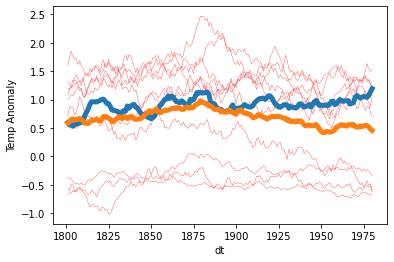

The R2 Score is -3.851908936520645


In [447]:
avg_model = np.average(model_avg,axis=1)



yest = min_max_scaler.inverse_transform(avg_model.reshape(180,1))
ytrue = min_max_scaler.inverse_transform(dval)


for model in range(10):
    plt.plot(x2,min_max_scaler.inverse_transform(model_avg[:,model].reshape(180,1)),'r',linewidth=0.5, alpha=0.6)

plt.plot(x2,ytrue,linewidth=5)
plt.plot(x2,yest,linewidth=5)


#plt.plot(x1, train_data[:,0,0], 'r', x2, test_data[:,0,0], 'b')
#plt.plot(np.concatenate(,previous_steps)
#plt.show()
plt.xlabel('dt')
plt.ylabel('Temp Anomaly')
plt.show()



print('The R2 Score is', r2_score(ytrue,yest))


In [578]:
from scipy.stats import spearmanr

In [579]:
spearmanr(yest,ytrue)

SpearmanrResult(correlation=0.013097132263046752, pvalue=0.8614727023877363)

Correlation of predicted time series with validation time series, where they overlap:

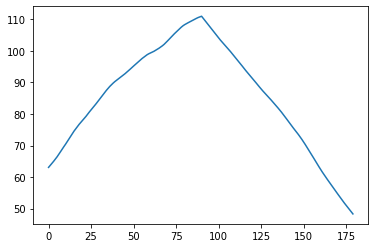

In [580]:
corr_trace = np.correlate(yest.reshape(180,),ytrue.reshape(180,),'same')
plt.plot(corr_trace)

### NON LINEAR REGRESSION USING POLYFIT


In [473]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree =4

In [482]:
model2 = make_pipeline(PolynomialFeatures(degree), RidgeCV(cv=10))
model2.fit(x1, dtrain)
print(model2.score(x1,dtrain))
print(model2['ridgecv'].alpha_)

0.7189676861269312
10.0


C:\Users\austi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=7.57508e-30): result may not be accurate.

C:\Users\austi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=7.57208e-30): result may not be accurate.

C:\Users\austi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=7.55425e-30): result may not be accurate.

C:\Users\austi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=7.50053e-30): result may not be accurate.

C:\Users\austi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=7.39133e-30): result may not be accurate.

C:\Users\austi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=7.23514e-30): result may not be acc

In [475]:
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=10))
model.fit(x1, dtrain)

C:\Users\austi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=7.10189e-28): result may not be accurate.



Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('ridge', Ridge(alpha=10))])

In [476]:
coefz = np.polyfit(x1.ravel(),dtrain.ravel(),deg=20)

C:\Users\austi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning:

Polyfit may be poorly conditioned



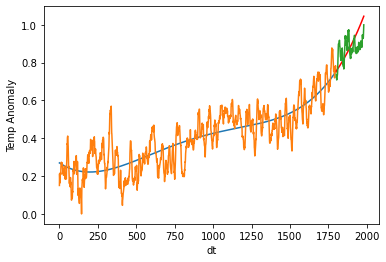

In [478]:

plt.plot(x1,model.predict(x1),x1,dtrain)
plt.plot(x2,model.predict(x2),'r',x2,dval)
#plt.plot(x1,np.polyval(coefz, x1))
plt.xlabel('dt')
plt.ylabel('Temp Anomaly')
plt.show()

In [479]:
from sklearn.metrics import r2_score

Model Preformance on test data:

In [480]:
r2_score(dval,model.predict(x2))

-0.9036252930055915

Model preformance on training data:

In [481]:
r2_score(dtrain,model.predict(x1))

0.7189676861269312

Final Anomaly predicted in Data: 

In [588]:
min_max_scaler.inverse_transform(dval[-1].reshape(1,1))

array([[1.19166739]])

Final Anomaly Predicted by model:

In [591]:
ypred2 = model.predict(x2)
min_max_scaler.inverse_transform(ypred2[-1].reshape(1,1))

array([[1.29466078]])

# Analysis of Temperture Data by Country

In [146]:
#Using the Datetime method as shown in visual analytics 
def dt_parse(timestamp_str):
    return pd.to_datetime(timestamp_str, format='%Y%m%d %H:%M:%S', errors='coerce')

country_temps = pd.read_csv('GlobalLandTemperaturesByCountry.csv',parse_dates=['dt'], date_parser=dt_parse)


country_temps['year']  = country_temps['dt'].dt.year
country_temps['month'] = country_temps['dt'].dt.month

In [147]:
country_temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month
0,1743-11-01,4.384,2.294,Åland,1743,11
1,1743-12-01,NaN,NaN,Åland,1743,12
2,1744-01-01,NaN,NaN,Åland,1744,1
3,1744-02-01,NaN,NaN,Åland,1744,2
4,1744-03-01,NaN,NaN,Åland,1744,3
...,...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013,5
577458,2013-06-01,17.613,0.473,Zimbabwe,2013,6
577459,2013-07-01,17.000,0.453,Zimbabwe,2013,7
577460,2013-08-01,19.759,0.717,Zimbabwe,2013,8


In [148]:
import re
country_temps['Max_Temp'] = 0
for i,j in enumerate(country_temps['Country'].unique()):
    
    fixed_name = re.sub("[\ (\[].*?[\)\]]","",j)
    country_temps.loc[country_temps['Country']==j,'Country2'] = fixed_name
    

In [149]:
np.unique(country_temps['Country2'])

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       "Côte D'Ivoire", 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Est

### Using re or regular expressions library, we have processed all the names to a uniform standard.. given changes in countries names throughout history...

-


### We now will conduct some feature engineering using the Country Temperature Data


#### 1) MaxT -> Max average monthly temp per country
#### 2) MinT  -> Min average monthly temp per country 
#### 3) Diff    -> Difference between the first year on record and second year on record 

In [483]:
tempfeaturesbyC   = {}
yearly_avg_by_c   = {}
change_all = []

czz = np.unique(country_temps['Country2'])

for v,c in enumerate(czz):
    #print(c)
    maxT = country_temps.loc[country_temps['Country2']==c,'AverageTemperature'].max()
    minT = country_temps.loc[country_temps['Country2']==c,'AverageTemperature'].min()
    yearmax = country_temps.loc[np.logical_and(country_temps['Country2']==c , country_temps['AverageTemperature']==maxT),'year'].max()
   #,year
    
    #print(c)
    min_year_on_record = country_temps.loc[country_temps['Country2']==c,'year'].min()
    max_year_on_record = country_temps.loc[country_temps['Country2']==c,'year'].max()
    init_temp          = country_temps.loc[np.logical_and(country_temps['Country2']==c , country_temps['year']==min_year_on_record),'AverageTemperature'].mean()
    fin_temp           = country_temps.loc[np.logical_and(country_temps['Country2']==c , country_temps['year']==max_year_on_record),'AverageTemperature'].mean()
    
#THIS LOOP IS TAKING TOO LONG, GOING TO HAVE TO WORK WITH DATA BY MONTH or Focus on specific Country. 
    #for years in country_temps.loc[country_temps['Country2']==c,'year']:
     #   yearly_avg_by_c[c] = years,country_temps.loc[np.logical_and(country_temps['Country2']==c,country_temps['year']==years),'AverageTemperature'].mean()
        
        
    diff               = fin_temp -init_temp
    tempfeaturesbyC[c] =  maxT,minT,diff,yearmax
    #print(fin_temp -init_temp)
    if np.isnan(diff) == 0:
        change_all.append(diff)
    
    
    #print(country_temps.loc[country_temps['Country2']==c,'AverageTemperature'].min())

In [151]:
cout = np.size(change_all)
print(cout)
np.average(change_all)

238


2.4379751288394145

In [152]:
df1 =pd.DataFrame(tempfeaturesbyC).T


df1 =df1.rename(columns={0: "maxtemp", 1:'mintemp',2: "tempdiff",3:'yearmaxtemp'})
df1['Country'] = df1.index
print(df1.head())

                maxtemp  mintemp  tempdiff  yearmaxtemp         Country
Afghanistan      28.533   -4.553 -1.845946       1997.0     Afghanistan
Africa           27.126   19.523  1.536477       2010.0          Africa
Albania          25.843   -2.049  6.373875       1757.0         Albania
Algeria          35.829    9.526  0.846875       2003.0         Algeria
American Samoa   28.543   24.712  1.156917       2003.0  American Samoa


### Top 10 Countries on Hottest Month 

In [256]:
df1.sort_values('maxtemp',ascending=False).head(10)

,maxtemp,mintemp,tempdiff,yearmaxtemp,Country
Kuwait,38.842,8.071,15.253375,2012.0,Kuwait
United Arab Emirates,37.750,15.736,2.136716,2010.0,United Arab Emirates
Qatar,37.603,13.888,2.326659,2012.0,Qatar
Bahrain,37.471,12.160,2.588648,2012.0,Bahrain
Iraq,37.401,3.838,4.914875,2000.0,Iraq
Saudi Arabia,36.495,12.759,2.701477,2012.0,Saudi Arabia
Algeria,35.829,9.526,0.846875,2003.0,Algeria
Mali,35.330,19.059,2.026000,2010.0,Mali
Djibouti,35.175,23.023,2.499917,2009.0,Djibouti
Oman,35.096,17.563,1.724739,2009.0,Oman


C:\Users\austi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



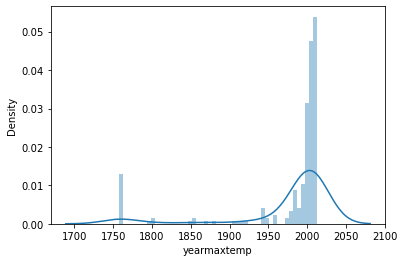

In [264]:
sns.distplot(df1['yearmaxtemp'])
plt.show()

In [486]:
plt.figure(figsize=(1,1))
import plotly.express as px
fig = px.choropleth(df1, locations=df1['Country'],
                    locationmode= 'country names',
                    color=df1['maxtemp'], # lifeExp is a column of gapminder                
                    color_continuous_scale=px.colors.sequential.Plasma,width=500, height=500)

fig.update_layout(coloraxis_colorbar=dict(
    title="maxtemp",
    thicknessmode="pixels", thickness=10,
    lenmode="pixels", len=200,
    ticks="outside",
    dtick=5
))
fig.show()

<Figure size 72x72 with 0 Axes>

In [1]:
plt.figure(figsize=(1,1))
import plotly.express as px
fig = px.choropleth(df1, locations=df1['Country'],
                    locationmode= 'country names',
                    color=df1['tempdiff'], # lifeExp is a column of gapminder                
                    color_continuous_scale=px.colors.sequential.Plasma,width=500, height=500)

fig.update_layout(coloraxis_colorbar=dict(
    title="tempdiff",
    thicknessmode="pixels", thickness=10,
    lenmode="pixels", len=200,
    ticks="outside",
    dtick=5
))
fig.show()

NameError: name 'plt' is not defined

In [167]:
df1

,maxtemp,mintemp,tempdiff,yearmaxtemp,Country
Afghanistan,28.533,-4.553,-1.845946,1997.0,Afghanistan
Africa,27.126,19.523,1.536477,2010.0,Africa
Albania,25.843,-2.049,6.373875,1757.0,Albania
Algeria,35.829,9.526,0.846875,2003.0,Algeria
American Samoa,28.543,24.712,1.156917,2003.0,American Samoa
...,...,...,...,...,...
Western Sahara,30.092,13.504,0.912500,2004.0,Western Sahara
Yemen,32.737,18.928,2.499083,1998.0,Yemen
Zambia,26.282,15.523,0.772818,2005.0,Zambia
Zimbabwe,26.601,14.079,0.556386,1995.0,Zimbabwe


### What country has experienced the max change??

In [583]:
df1['tempdiff'].sort_values(axis=0, ascending=False).head(10)

Kuwait        15.253375
Ukraine        9.015500
Azerbaijan     8.938875
Moldova        8.545500
Georgia        8.381125
Syria          7.925125
Macedonia      7.829125
Romania        7.755500
Serbia         7.692625
Finland        7.635125
Name: tempdiff, dtype: float64

### EMISSIONS DATA + POP

In [209]:
popdf = pd.read_csv('population.csv')
ghg   = pd.read_csv('greenhouse_gas.csv')

In [234]:
popdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1970 to 2019
Columns: 264 entries, Aruba to Zimbabwe
dtypes: object(264)
memory usage: 103.5+ KB


In [229]:
ghg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            0 non-null      float64
 5   1970            239 non-null    float64
 6   1971            238 non-null    float64
 7   1972            238 non-null    float64
 8   1973            237 non-null    float64
 9   1974            236 non-null    float64
 10  1975            237 non-null    float64
 11  1976            236 non-null    float64
 12  1977            237 non-null    float64
 13  1978            235 non-null    float64
 14  1979            235 non-null    float64
 15  1980            239 non-null    float64
 16  1981            241 non-null    float64
 17  1982            242 non-null    flo

In [182]:
df2 = ghg.iloc[:,5:].T

In [187]:
df2.columns = ghg['Country Name']

In [214]:
#popdf = popdf.T

In [219]:
popdf.columns = popdf.iloc[0,:]

In [228]:
popdf = popdf.iloc[14:,:]

In [250]:
df2.index = df2.index.rename('Year')

In [283]:
popdf['year'] = popdf.index
popdf['year'] = popdf['year'].astype(int)
popdf = popdf[popdf['year']<2013]

<ipython-input-283-64c41b42ccea>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-283-64c41b42ccea>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [567]:
popdf['Central African Republic']

1970    1.81114e+06
1971    1.84052e+06
1972    1.86778e+06
1973    1.89485e+06
1974    1.92439e+06
1975    1.95837e+06
1976    1.99701e+06
1977    2.03992e+06
1978    2.08766e+06
1979    2.14078e+06
1980    2.19936e+06
1981    2.26444e+06
1982    2.33533e+06
1983    2.40832e+06
1984    2.47838e+06
1985    2.54217e+06
1986    2.59776e+06
1987    2.64684e+06
1988    2.69397e+06
1989    2.74573e+06
1990    2.80673e+06
1991    2.87851e+06
1992    2.95924e+06
1993    3.04615e+06
1994    3.13502e+06
1995    3.22266e+06
1996    3.30823e+06
1997    3.39244e+06
1998    3.47549e+06
1999    3.55801e+06
2000    3.64043e+06
2001    3.72202e+06
2002    3.80213e+06
2003    3.88118e+06
2004    3.95988e+06
2005    4.03838e+06
2006    4.11807e+06
2007    4.19801e+06
2008    4.27337e+06
2009    4.33762e+06
2010    4.38677e+06
2011    4.41864e+06
2012    4.43642e+06
Name: Central African Republic, dtype: object

In [281]:
df2['year'] = df2.index
df2['year'] = df2['year'].astype(int)
df2 = df2[df2['year']<2013]

In [326]:
new_df = pd.DataFrame()
new_df2 = pd.DataFrame()


czz = np.unique(country_temps['Country2'])
for col in popdf.columns:
    if col in df2.columns:
        if col in czz:
            #print(col)
            col_name1 = 'Norm_GHG_' + col
            #print(col_name1)
            new_df2[col]       = df2[col]
            new_df[col_name1] = df2[col]/popdf[col]
        

In [ ]:
new_df2 []

In [322]:
#new_df = new_df.drop('Norm_GHG_year',axis=1)

In [488]:
print(new_df.sum().sort_values(axis=0, ascending=False).head(10))

series3 = new_df.sum().sort_values(axis=0, ascending=False).head(10

Norm_GHG_Central African Republic    3.146584
Norm_GHG_Qatar                       2.754230
Norm_GHG_United Arab Emirates        2.389046
Norm_GHG_Iceland                     1.916936
Norm_GHG_Australia                   1.528191
Norm_GHG_Kuwait                      1.496952
Norm_GHG_Luxembourg                  1.443246
Norm_GHG_Estonia                     1.380209
Norm_GHG_Zambia                      1.175703
Norm_GHG_Bolivia                     1.127260
dtype: float64


In [ ]:
new_df2.sum().sort_values(axis=0, ascending=False).head(10)

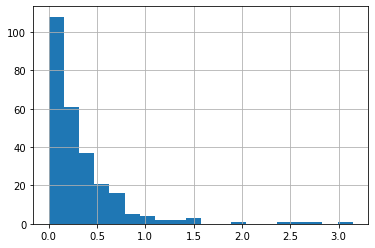

In [305]:
new_df.sum().hist(bins=20)

In [315]:
df3 = df2.melt('year',var_name='cols',  value_name='vals')
#g = sns.factorplot(x=df3.index, y="vals", hue='cols', data=df3)

,year,cols,vals
0,1970,Aruba,42.306298
1,1971,Aruba,42.786948
2,1972,Aruba,43.286613
3,1973,Aruba,43.724590
4,1974,Aruba,44.130957
...,...,...,...
11347,2008,Zimbabwe,68840.706000
11348,2009,Zimbabwe,67914.131010
11349,2010,Zimbabwe,71019.116730
11350,2011,Zimbabwe,71561.952250


In [552]:

series2 = new_df2.sum().sort_values(axis=0, ascending=False).head(10)

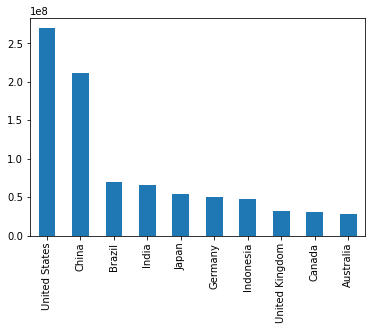

In [553]:

series2.plot(kind='bar')
plt.show()

In [561]:
names = []
for name in series3.index:
     names.append(re.sub("Norm_GHG_","",name))

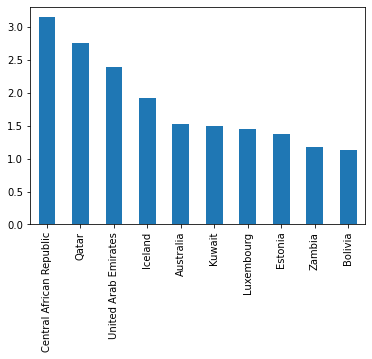

In [566]:
series3 = new_df.sum().sort_values(axis=0, ascending=False).head(10)





series3.index =  names
series3.plot(kind='bar')
#print(series3)
plt.show()